In [1]:
did = False
if not did:
    %cd ..
    did = True

/Users/adsurbum/projects/univer/EffectiveNPI/src


In [2]:
%load_ext autoreload
%autoreload
exec(open("plot_utils.py").read())

/Users/adsurbum/anaconda2/envs/py371/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%time
import os,fnmatch
dir_name = '../{}/{}/inference/'.format('output','2020-05-04-start-date-5zeros')

countries = [a[:-4] for a in fnmatch.filter(os.listdir(dir_name), '*.npz')]
countries = ['Sweden',
     'Belgium',
     'United_Kingdom',
     'Switzerland',
    #  'Wuhan',
     'Germany',
     'Austria',
     'Spain',
     'France',
     'Italy',
     'Denmark',
     'Norway']

def calc_stats(countries,dir_name):
    dic_arr = []
    loglik_arr = []
    lnprobs = []
    for country_name in countries:
        load_data(dir_name+country_name+'.npz',country_name)
        dic_arr.append(calc_DIC())
        loglik_arr.append(calc_LoglikMAP())
        lnprobs.append(lnprobability.mean())
    return dic_arr,loglik_arr,lnprobs


CPU times: user 626 µs, sys: 750 µs, total: 1.38 ms
Wall time: 694 µs


In [5]:
%%time
dir_name = '../{}/{}/inference/'.format('output','2020-05-04-start-date-5zeros')
five = calc_stats(countries,dir_name)

CPU times: user 15.2 s, sys: 3.66 s, total: 18.9 s
Wall time: 24.8 s


In [6]:
dir_name = '../{}/{}/inference/'.format('output','2020-05-04-start-date-10zeros')
ten = calc_stats(countries,dir_name)
dir_name = '../{}/{}/inference/'.format('output','2020-05-04-start-date-15zeros')
fiveteen = calc_stats(countries,dir_name)

In [7]:
dir_name = '../{}/{}/inference/'.format('output','2020-05-04-start-date-1zero-copied')
one = calc_stats(countries,dir_name)

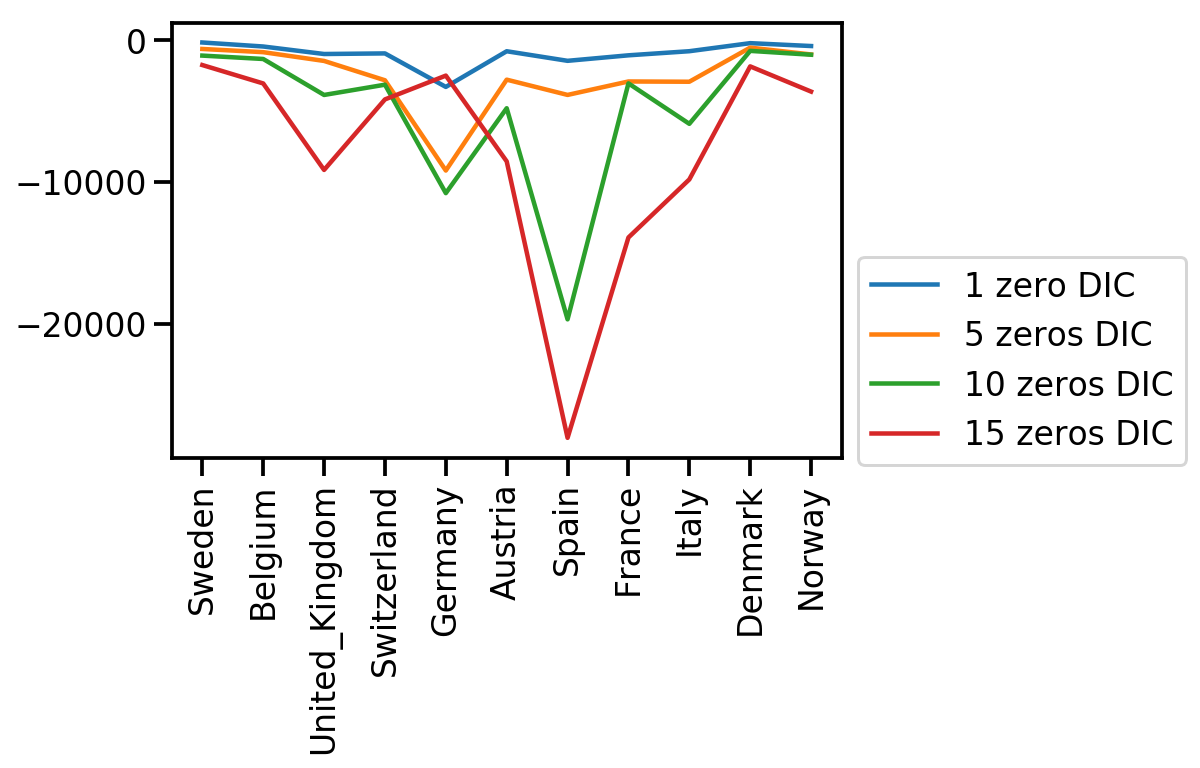

In [8]:
import matplotlib.pyplot as plt
plt.plot(one[0],label='1 zero DIC')
plt.plot(five[0],label='5 zeros DIC')
plt.plot(ten[0], label='10 zeros DIC')
plt.plot(fiveteen[0], label='15 zeros DIC')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);

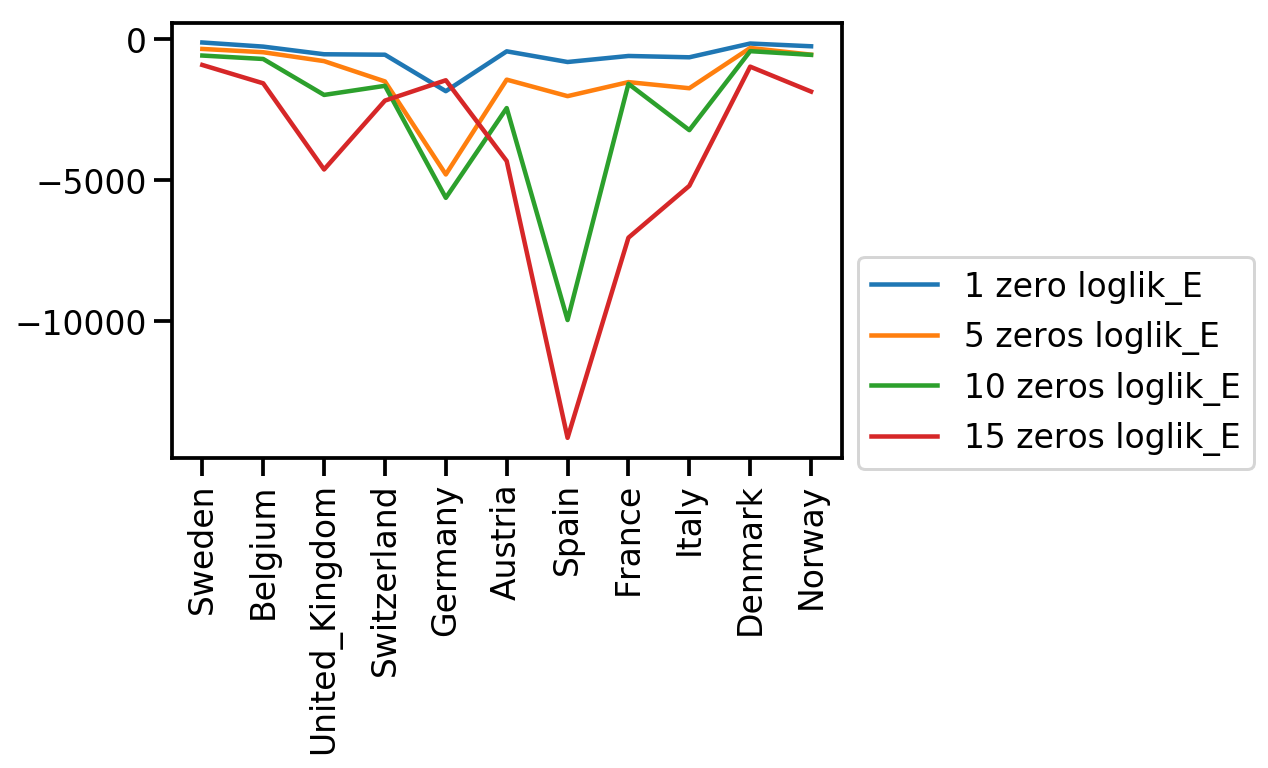

In [9]:
import matplotlib.pyplot as plt
plt.plot(one[1],label='1 zero loglik_E')
plt.plot(five[1],label='5 zeros loglik_E')
plt.plot(ten[1], label='10 zeros loglik_E')
plt.plot(fiveteen[1], label='15 zeros loglik_E')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);

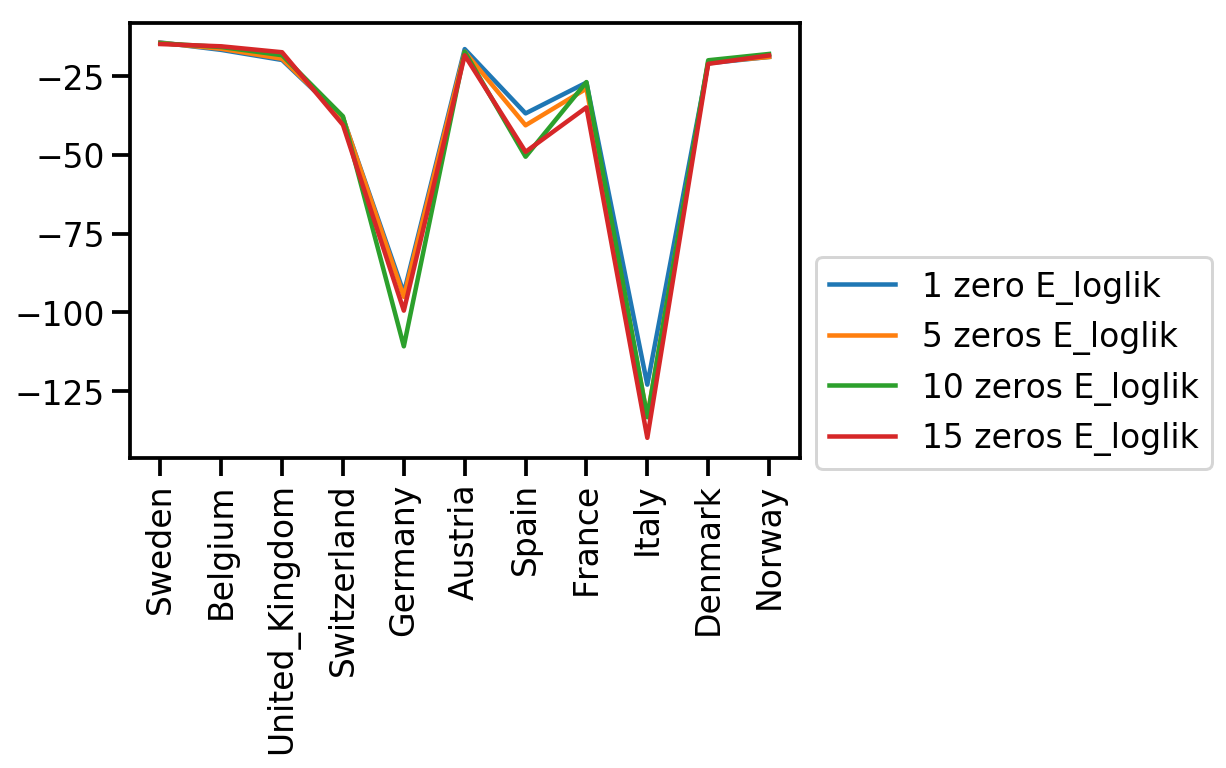

In [10]:
import matplotlib.pyplot as plt
plt.plot(one[2],label='1 zero E_loglik')
plt.plot(five[2],label='5 zeros E_loglik')
plt.plot(ten[2], label='10 zeros E_loglik')
plt.plot(fiveteen[2], label='15 zeros E_loglik')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);